In [11]:
import numpy as np
import pandas as pd
import os
from IPython.display import clear_output

In [12]:
def get_data():
  df = pd.read_csv('ecommerce_data.csv')
  data = df.as_matrix() #convert to numpy array
  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1] # till the last column
  Y = data[:,-1].astype(np.int32)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1

  # assign X2 back to X, since we don't need original anymore
  X = X2

  # split train and test
  Xtrain = X[:-100]
  Ytrain = Y[:-100]
  Xtest = X[-100:]
  Ytest = Y[-100:]

  # normalize columns 1 and 2
  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest

In [13]:
def get_binary_data():
  # return only the data from the first 2 classes
  # processing logic: keeps only the y value with 0 or 1
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [15]:
#calculations in the feedforward network
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [16]:
# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)
# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [17]:
# main training loop
def main():
    # get the data
    Xtrain, Ytrain, Xtest, Ytest = get_binary_data()
    # randomly initialize weights
    D = Xtrain.shape[1] #get the number of columns
    W = np.random.randn(D) # only one output node Dimension is D x 1
    b = 0 # bias term
    train_costs=[]
    test_costs=[]
    learning_rate=0.00001
    for i in range(100001):
        pYtrain=forward(Xtrain,W,b)
        pYtest=forward(Xtest,W,b)
        ctrain=cross_entropy(Ytrain,pYtrain)
        ctest=cross_entropy(Ytest,pYtest)
        train_costs.append(ctrain)
        test_costs.append(ctest)
        
        #Gradient descent
        W-=learning_rate*Xtrain.T.dot(pYtrain-Ytrain)
        b-=learning_rate*(pYtrain-Ytrain).sum()
        if i%10000==0:
            clear_output(wait=True)
            print("loop: ",i,"\ntraining cost: ",ctrain,"\ntesting cost: ",ctest)
    legend1, = plt.plot(train_costs, label='train cost')
    legend2, = plt.plot(test_costs, label='test cost')
    plt.legend([legend1, legend2])
    plt.show()


loop:  100000 
training cost:  0.152240070356 
testing cost:  0.304102564599


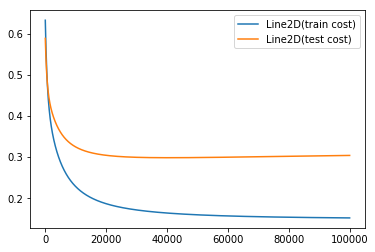

In [18]:
if __name__ == '__main__':
    main()